In [2]:
from importlib import reload
import itertools

import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2
import main

In [ ]:
import os

os.chdir('lab2')

In [11]:
df = pd.read_csv('ex2data1.txt', header=None, names=['first_exam', 'second_exam', 'is_accepted'])
x, means, widths = main.create_design_matrix(df[['first_exam', 'second_exam']])
y = df.is_accepted

/mnt/d/Study/ML/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


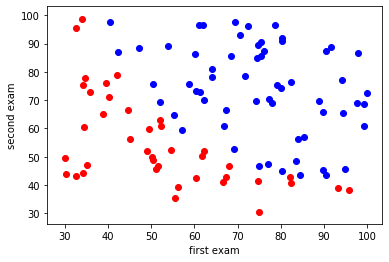

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

is_accepted = df[df.is_accepted == 1]
is_not_accepted = df[df.is_accepted == 0]
plt.scatter(is_accepted.first_exam, is_accepted.second_exam, c='blue')
plt.scatter(is_not_accepted.first_exam, is_not_accepted.second_exam, c='red')
plt.xlabel('first exam')
plt.ylabel('second exam')

plt.show()

In [5]:
alpha = 1
sensitivity = 0.001
theta_0 = pd.Series(0, index=range(len(df.columns)))

prev_loss = None
theta = None
_progress = []
for current_theta, loss in main.gradient_descent(theta_0, x, y, alpha):
    _progress.append(loss)
    delta = 0 if loss == 0 \
        else sensitivity if prev_loss is None \
        else (prev_loss - loss) / loss
    if delta < 0:
        raise ValueError('Loss increases. Decrease the learning rate')
    if delta < sensitivity:
        theta = current_theta
        break
    prev_loss = loss
progress = pd.DataFrame(_progress)

print('Finished in {} iterations. Final loss: {}'.format(len(progress), progress.iloc[-1][0]))

Finished in 230 iterations. Final loss: 0.2671191576745931


In [27]:
def hypothesis(sample):
    sample = np.insert(sample, 0, 1)
    normalized = main.normalize_known(sample, means, widths)
    return main.logistic_hypothesis(normalized, theta)

hypothesis([80, 40])

0.46570986445565415

In [7]:
from scipy.optimize import minimize

print('Our solution:')
print('Loss: {}'.format(progress.iloc[-1][0]))
print(np.array(theta))

func = lambda _theta: main.logistic_loss(_theta, x, y)

# NOTE: we terminate by relative sensitivity

result = minimize(func, theta_0, method='Nelder-Mead', tol=sensitivity)
print('Nelder-Mead solution:')
print('Loss: {}'.format(result.fun))
print(result.x)

result = minimize(func, theta_0, method='BFGS', tol=sensitivity)
print('BFGS solution:')
print('Loss: {}'.format(result.fun))
print(result.x)

Our solution:
Loss: 0.2671191576745931
[0.76532493 6.14783817 5.64333552]
Nelder-Mead solution:
Loss: 0.693122188372445
[0.00025 0.      0.     ]
BFGS solution:
Loss: 0.2035080571439959
[ 1.72920416 14.32795398 13.73252897]


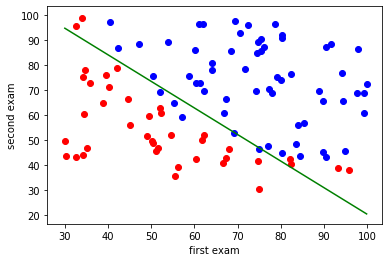

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

is_accepted = df[df.is_accepted == 1]
is_not_accepted = df[df.is_accepted == 0]
plt.scatter(is_accepted.first_exam, is_accepted.second_exam, c='blue')
plt.scatter(is_not_accepted.first_exam, is_not_accepted.second_exam, c='red')
plt.xlabel('first exam')
plt.ylabel('second exam')
plt.plot()

x_values = np.array([df.first_exam.min(), df.first_exam.max()])
normalized_x_values = main.normalize_known(x_values, means, widths, 1)
normalized_y_values = -1 / theta[2] * (theta[0] + theta[1] * normalized_x_values)
y_values = main.denormalize_known(normalized_y_values, means, widths, 2)

plt.plot(x_values, y_values, c='green')

plt.show()